In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [3]:
import os

base_dir = os.path.join(path, "chest_xray")
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [5]:
import os

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

for root, dirs, files in os.walk(path):
    print(root)
    break  # Just print the top-level folder


/kaggle/input/chest-xray-pneumonia


In [6]:
os.listdir(path)


['chest_xray']

In [7]:
os.listdir(os.path.join(path, 'chest_xray'))


['chest_xray', '__MACOSX', 'val', 'test', 'train']

In [8]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')


In [10]:
base_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training; only rescaling for validation/test
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.8456 - loss: 0.3838 - val_accuracy: 0.8750 - val_loss: 0.3020
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9548 - loss: 0.1172 - val_accuracy: 0.9375 - val_loss: 0.1340
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9719 - loss: 0.0838 - val_accuracy: 0.8750 - val_loss: 0.2360
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9706 - loss: 0.0703 - val_accuracy: 0.8125 - val_loss: 0.2661
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9705 - loss: 0.0808 - val_accuracy: 1.0000 - val_loss: 0.0653
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.9790 - loss: 0.0582 - val_accuracy: 0.7500 - val_loss: 0.3228
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.9771 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 0.0447
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9857 - loss: 0.0372 - val_accu

In [16]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 723ms/step - accuracy: 0.7497 - loss: 1.9980
Test Accuracy: 0.75


In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image Generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load MobileNetV2 base
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early_stop]
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.6752 - loss: 0.7206 - val_accuracy: 0.7500 - val_loss: 0.4217
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.9052 - loss: 0.2270 - val_accuracy: 0.9375 - val_loss: 0.3364
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9242 - loss: 0.1829 - val_accuracy: 0.9375 - val_loss: 0.3196
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.9326 - loss: 0.1734 - val_accuracy: 0.9375 - val_loss: 0.3165
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9411 - loss: 0.1582 - val_accuracy: 0.9375 - val_loss: 0.2751
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9319 - loss: 0.1611 - val_accuracy: 0.9375 - val_loss: 0.3132
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step -

In [19]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8731 - loss: 0.2699
Test Accuracy: 0.88


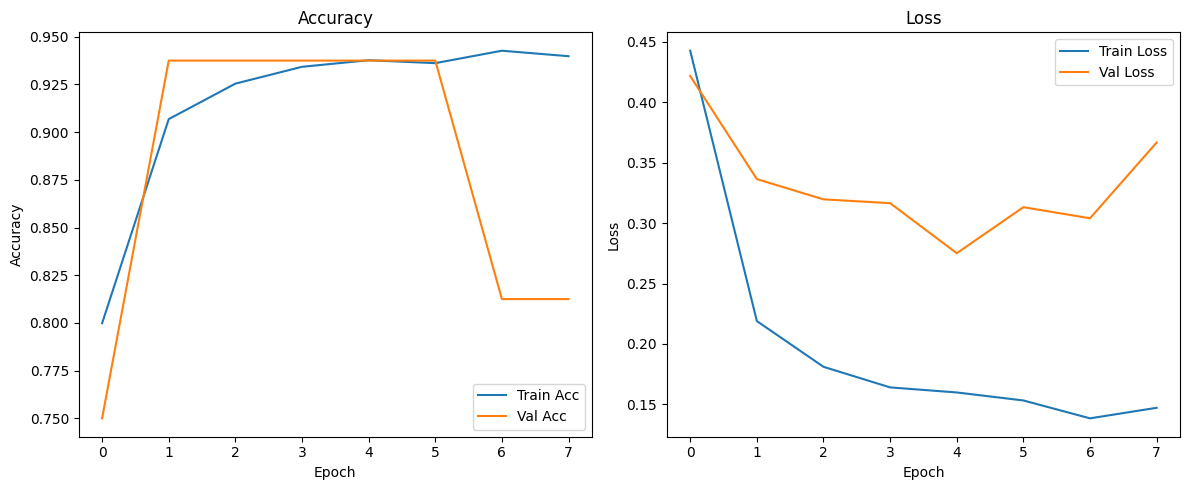

In [20]:
import matplotlib.pyplot as plt

# Plot training/validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training/validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step


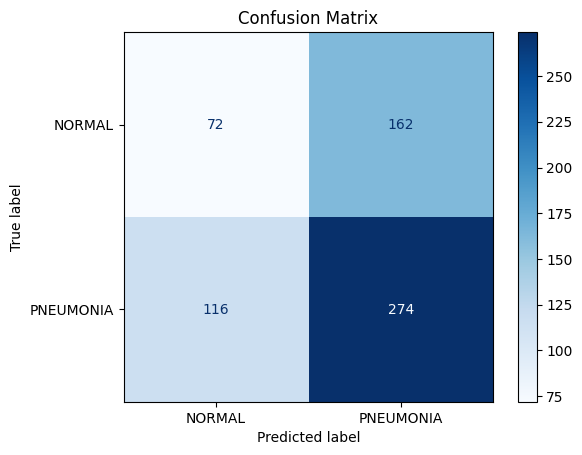

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true and predicted labels
y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()
y_true = test_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys()))


              precision    recall  f1-score   support

      NORMAL       0.38      0.31      0.34       234
   PNEUMONIA       0.63      0.70      0.66       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.55      0.54       624

